In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap
from scipy.special import expit

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodka.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
x = df.drop(columns=['quality'])
y = df['quality']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',LinearRegression())
])

In [8]:
param_grid = {
    'lr__fit_intercept': [True, False],
    'lr__copy_X': [True, False],
    'lr__positive': [True, False],
}

grid_search = GridSearchCV(pipeline,
param_grid=param_grid,
scoring='r2',
cv=5,
n_jobs=-1
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__copy_X': [True, False],
                         'lr__fit_intercept': [True, False],
                         'lr__positive': [True, False]},
             scoring='r2')

In [9]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

[5.35357371 5.09912568 5.57682821 5.41799875 5.74490508 5.25772794
 5.0826597  5.14511366 5.72994817 5.71270331 6.10137153 5.25516977
 5.56372884 5.23527938 5.43831703 6.51110447 5.20042128 5.56976309
 6.54366718 5.30558621 5.46309438 5.18216542 6.01894951 6.44719508
 5.36907495 5.4115324  6.35614441 5.40287332 5.19786498 6.14291428
 5.27631732 5.57631088 5.73533449 5.35242002 5.45190892 5.06224368
 6.17822255 5.71867262 5.58578454 6.20982929 5.4394849  5.27961282
 6.14609111 5.20436338 5.79128264 5.80373065 6.38432277 5.53422246
 5.16870196 5.59002225 5.13991702 5.04596355 5.61622696 6.44522513
 4.98399941 4.9953966  6.02347811 5.4687742  5.87654156 5.24682593
 5.63178735 5.96489106 5.27226332 5.34043803 6.47845623 5.38618203
 6.34651588 5.25248656 6.43465418 5.28837891 6.48194861 4.76536406
 5.76392588 5.87736164 6.21471334 5.28008762 6.87486578 5.88030285
 6.16115393 6.49707497 5.33570516 6.44604203 5.4216303  5.69477316
 5.74770342 6.37753957 5.28477183 5.88787373 6.30189935 5.2282

In [10]:
proba = expit(y_pred)
print(proba)

[0.99529107 0.99393493 0.99622972 0.99558358 0.99681116 0.99481985
 0.99383486 0.99420595 0.99676326 0.99670715 0.99776521 0.99480665
 0.9961802  0.99470287 0.99567202 0.99851537 0.994516   0.99620309
 0.99856287 0.99506073 0.99577749 0.99441553 0.99757368 0.99841755
 0.99536316 0.99555505 0.99826696 0.99551657 0.99450204 0.99785595
 0.99491477 0.99622777 0.9967806  0.99528566 0.9957302  0.9937085
 0.99793018 0.99672668 0.99626321 0.99799445 0.99567705 0.99493142
 0.99786274 0.99453746 0.99695524 0.99699279 0.99831503 0.99606626
 0.99434026 0.99627895 0.99417594 0.99360589 0.99637485 0.99841443
 0.99319993 0.99327648 0.99758461 0.99580131 0.99720338 0.99476337
 0.99643062 0.99743925 0.99489422 0.9952291  0.99846618 0.99544145
 0.99825022 0.99479277 0.99839761 0.99497543 0.99847152 0.99155219
 0.99687106 0.99720566 0.9980042  0.99493381 0.99896763 0.99721385
 0.99789462 0.99849443 0.99520658 0.99841572 0.99559951 0.99664778
 0.99682005 0.99830358 0.99495737 0.9972348  0.99817053 0.99466

In [11]:
prediksi = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\vodkapredict.csv")
prediksi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.6,0.38,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4
1,7.6,0.51,0.15,2.8,0.110,33.0,73.0,0.9955,3.17,0.63,10.2
2,7.7,0.62,0.04,3.8,0.084,25.0,45.0,0.9978,3.34,0.53,9.5
3,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6
4,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.9983,3.26,0.77,9.4


In [12]:
y_prediksi = best_model.predict(prediksi)
probabilitas_prediksi = expit(y_prediksi)
print(y_prediksi)
print(probabilitas_prediksi)

[5.28422622 5.59045537 5.23194046 5.66020473 5.23859426 5.33781418]
[0.99495463 0.99628056 0.99468525 0.99653028 0.99472031 0.99521663]


In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
p = x_test.shape[1]
r2_adj = 1 - ((1-r2) * (n - 1) / (n - p - 1))

print(mse)
print(mae)
print(rmse)
print(r2)
print(r2_adj)

0.42071524352536777
0.5134581970693705
0.6486256574676704
0.35658405328517406
0.3436687696832341


In [14]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [-0.45151034 -0.5330509  -0.44759191 -0.3980303  -0.35044433]
Mean CV Accuracy: -0.43612555453646457


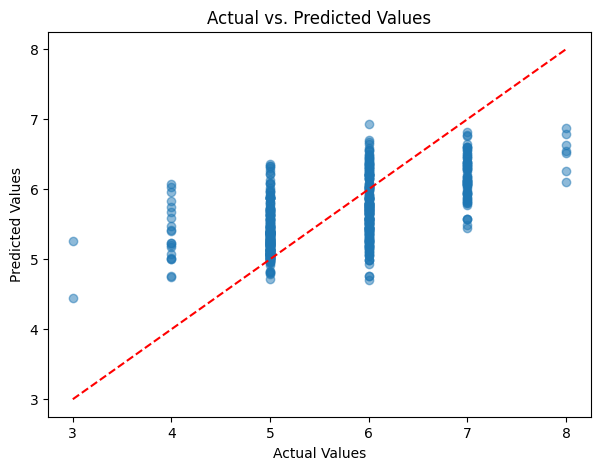

In [57]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

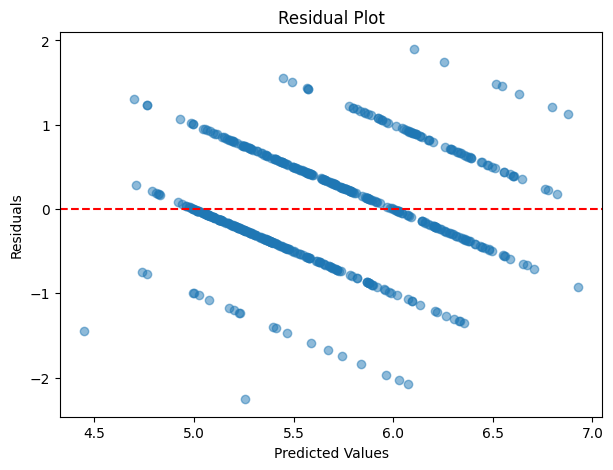

In [58]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

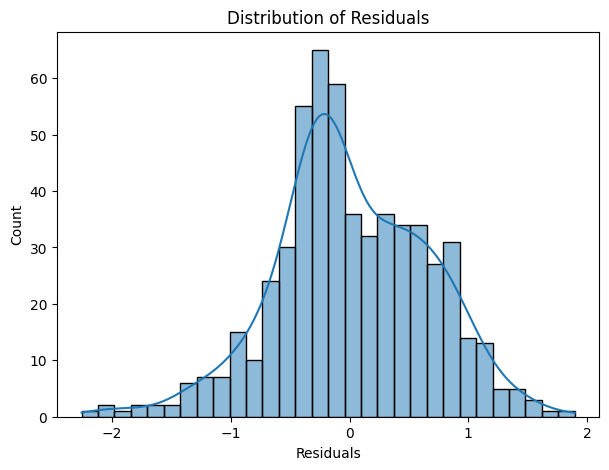

In [59]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

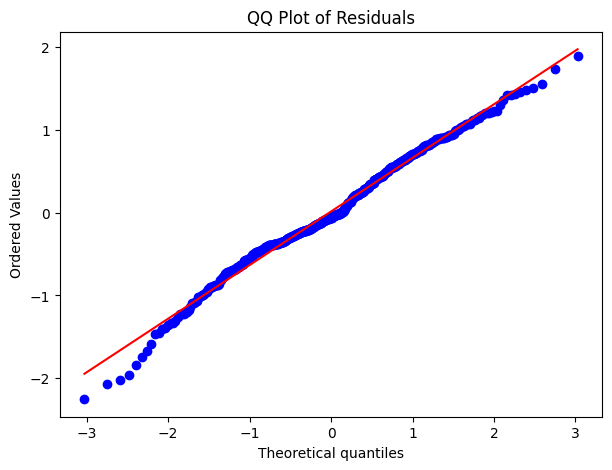

In [60]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

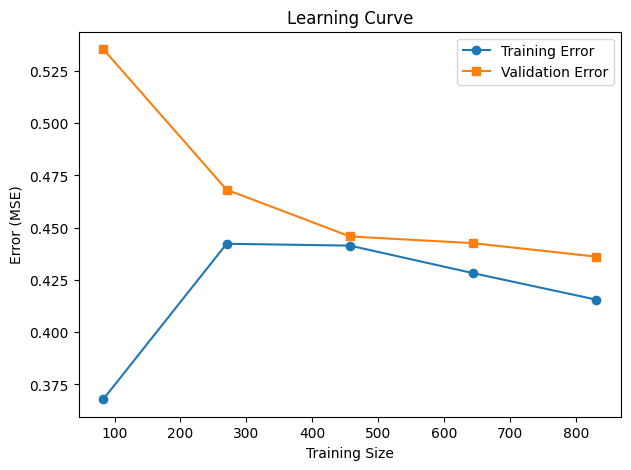

In [61]:
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring="neg_mean_squared_error")

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [ ]:
lr = best_model.named_steps['lr']
feature_importance = np.abs(lr.coef_)

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=x.columns, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [ ]:
explainer = shap.Explainer(en, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)

In [62]:
w = df.drop(columns=['quality'])
z = df['quality']

In [63]:
w_train, w_test, z_train, z_test = train_test_split(w,z, test_size=0.35, random_state=42)

In [64]:
quadratic_feature = PolynomialFeatures(degree=2)
w_train_quadratic = quadratic_feature.fit_transform(w_train)

In [65]:
param_grid_quadratic = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

grid_search_quadratic = GridSearchCV(
estimator= LinearRegression(),
param_grid=param_grid_quadratic,
scoring='r2',
cv=5,
n_jobs=-1
)

grid_search_quadratic.fit(w_train_quadratic, z_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [66]:
best_model_quadratic = grid_search_quadratic.best_estimator_

w_test_quadratic = quadratic_feature.transform(w_test)
y_pred_quadratic = best_model_quadratic.predict(w_test_quadratic)

In [67]:
mse_quadratic = mean_squared_error(z_test, y_pred_quadratic)
mae_quadratic = mean_absolute_error(z_test, y_pred_quadratic)
rmse_quadratic = root_mean_squared_error(z_test,y_pred_quadratic)
r2_quadratic = r2_score(z_test, y_pred_quadratic)

n_quadratic = len(z_test)
p_quadratic = w_test_quadratic.shape[1]
r2_adj_quadratic = 1 - ((1-r2_quadratic) * (n_quadratic - 1) / (n_quadratic - p_quadratic - 1))

print(mse_quadratic)
print(mae_quadratic)
print(rmse_quadratic)
print(r2_quadratic)
print(r2_adj_quadratic)

0.47337868907447245
0.5459255513592386
0.6880252096213281
0.27604382757025114
0.15864552933840004


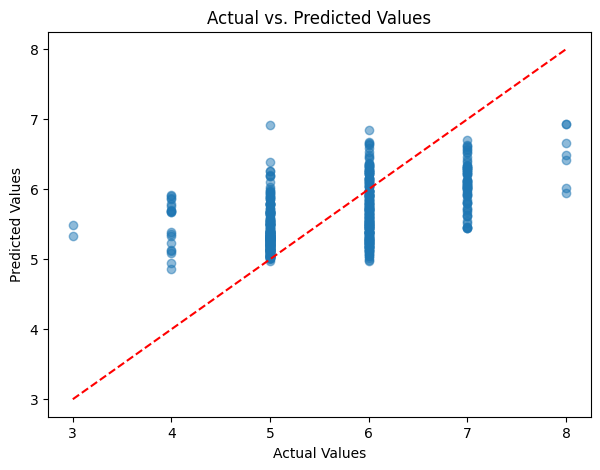

In [68]:
plt.figure(figsize=(7, 5))
plt.scatter(z_test, y_pred_quadratic, alpha=0.5)
plt.plot([min(z_test), max(z_test)], [min(z_test), max(z_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

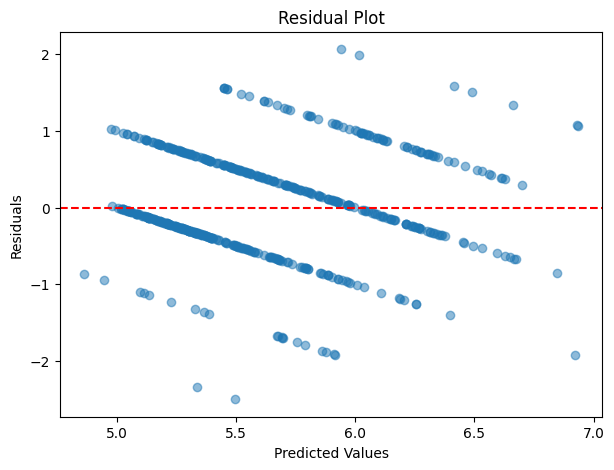

In [69]:
residuals_quadratic = z_test - y_pred_quadratic

plt.figure(figsize=(7, 5))
plt.scatter(y_pred_quadratic, residuals_quadratic, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

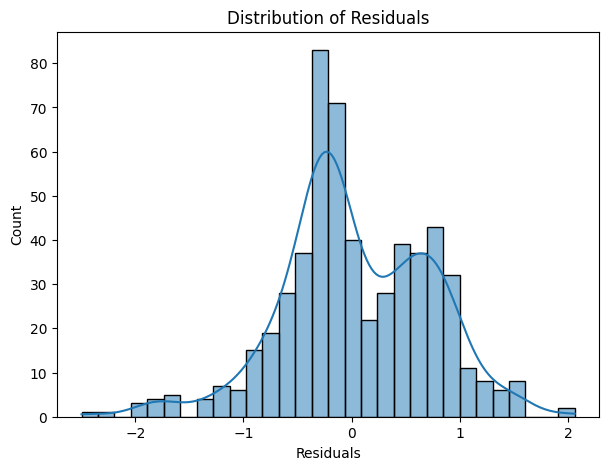

In [70]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals_quadratic, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

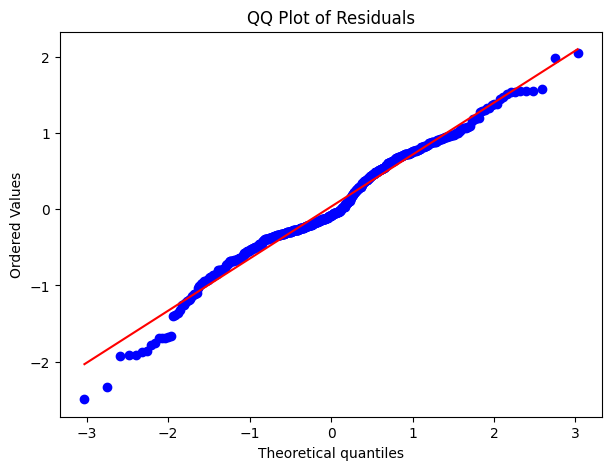

In [71]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals_quadratic, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

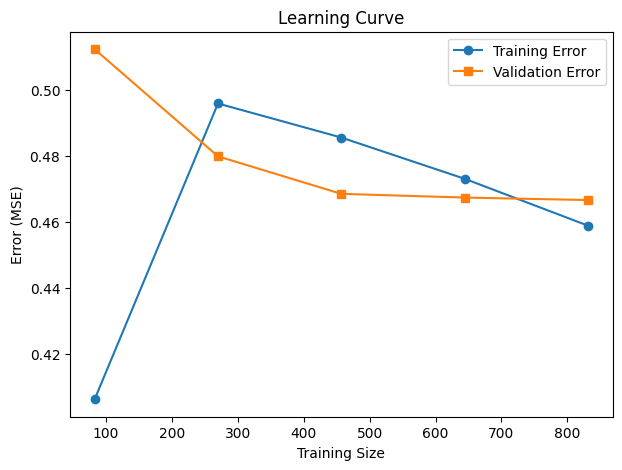

In [72]:
train_sizes_quadratic, train_scores_quadratic, test_scores_quadratic = learning_curve(
    best_model_quadratic, w_train_quadratic, z_train, cv=5, scoring="neg_mean_squared_error")

train_mean_quadratic = -train_scores_quadratic.mean(axis=1)
test_mean_quadratic = -test_scores_quadratic.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes_quadratic, train_mean_quadratic, label="Training Error", marker="o")
plt.plot(train_sizes_quadratic, test_mean_quadratic, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [ ]:
en = best_model.named_steps['en']
feature_importance = np.abs(en.coef_)

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=x.columns, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [ ]:
explainer = shap.Explainer(en, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x.columns)
shap.plots.bar(shap_values)

In [ ]:
m = df.drop(columns=['quality'])
n = df['quality']

: 

In [74]:
m_train, m_test, n_train, n_test = train_test_split(m,n, test_size=0.35, random_state=42)

In [75]:
cubic_feature = PolynomialFeatures(degree=3)
m_train_cubic = cubic_feature.fit_transform(m_train)

In [76]:
param_grid_cubic = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

grid_search_cubic = GridSearchCV(
estimator= LinearRegression(),
param_grid=param_grid_quadratic,
scoring='r2',
cv=5,
n_jobs=-1
)

grid_search_cubic.fit(m_train_cubic, n_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [77]:
best_model_cubic = grid_search_cubic.best_estimator_

m_test_cubic = cubic_feature.transform(m_test)
y_pred_cubic = best_model_cubic.predict(m_test_cubic)

In [78]:
mse_cubic = mean_squared_error(n_test, y_pred_cubic)
mae_cubic = mean_absolute_error(n_test, y_pred_cubic)
rmse_cubic = root_mean_squared_error(n_test,y_pred_cubic)
r2_cubic = r2_score(n_test, y_pred_cubic)

n_cubic = len(n_test)
p_cubic = m_test_cubic.shape[1]
r2_adj_cubic = 1 - ((1-r2_cubic) * (n_cubic - 1) / (n_cubic - p_cubic - 1))

print(mse_cubic)
print(mae_cubic)
print(rmse_cubic)
print(r2_cubic)
print(r2_adj_cubic)

0.47153841103148003
0.5454637251589738
0.6866865449617314
0.27885823531390375
-1.0672730587668093


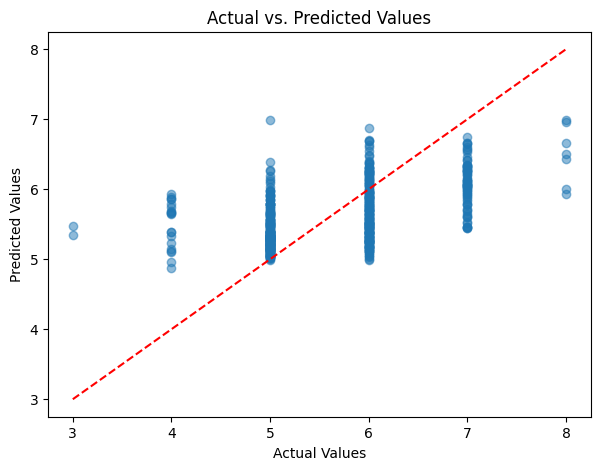

In [79]:
plt.figure(figsize=(7, 5))
plt.scatter(n_test, y_pred_cubic, alpha=0.5)
plt.plot([min(n_test), max(n_test)], [min(n_test), max(n_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

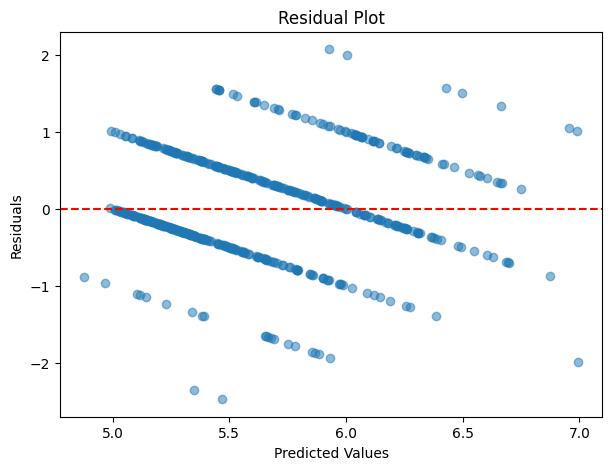

In [80]:
residuals_cubic = n_test - y_pred_cubic

plt.figure(figsize=(7, 5))
plt.scatter(y_pred_cubic, residuals_cubic, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

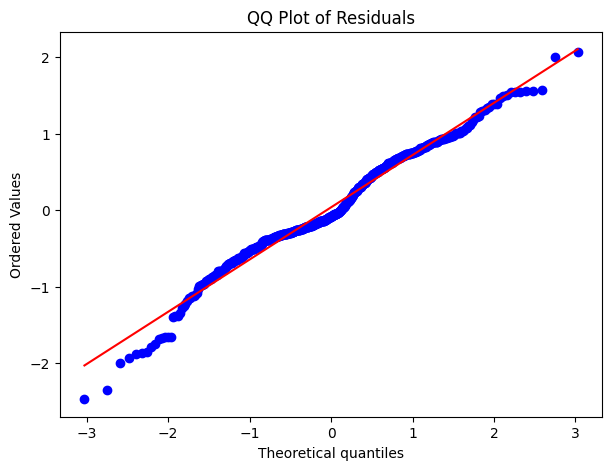

In [81]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals_cubic, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

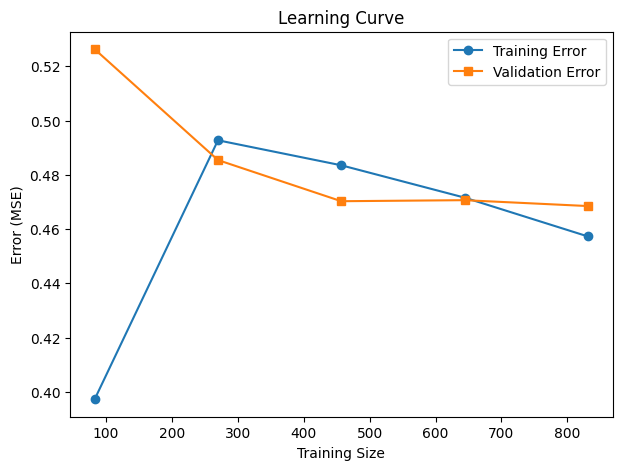

In [82]:
train_sizes_cubic, train_scores_cubic, test_scores_cubic = learning_curve(
    best_model_cubic, m_train_cubic, n_train, cv=5, scoring="neg_mean_squared_error")

train_mean_cubic = -train_scores_cubic.mean(axis=1)
test_mean_cubic = -test_scores_cubic.mean(axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes_cubic, train_mean_cubic, label="Training Error", marker="o")
plt.plot(train_sizes_cubic, test_mean_cubic, label="Validation Error", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.title("Learning Curve")
plt.show()